#### **Exercício 01**
Seja $T:\mathbb{R}^2 \to \mathbb{R}^2$ a transformação linear tal que $T(1,0) = (cos\;\theta,\;sen\;\theta)$ e $T(0,1) = (-sen\;\theta,\;cos\;\theta)$, com $\theta \in \mathbb{R}$.

- Determine a transformação $T$ e sua matriz na base canônica.
- Implemente uma função que recebe um parâmetro $\theta$ e retorna a matriz da transformação $T$.
- Aplique essa transformação no triângulo de vértices $(-1,1)$, $(1,1)$ e $(0,1)$ com $\theta=\pi / 4$ e visualize o resultado. O que você pode observar em relação a transformação $T$ ?

$(x,y) = x(1,0) + y(0,1)$

$T(x,y) = x(T(1,0)) + y(T(1,0))$

$T(x,y) = x(cos\;\theta,\;sen\;\theta) + y(-sen\;\theta,\;cos\;\theta)$

$T(x,y) = (x \;cos\;\theta - y \;sen\;\theta,x \;sen\;\theta + y \;cos\;\theta)$

In [24]:
import inspect
import numpy as np

def T(x,y):
    '''
    T(x,y) = (x cos t - y sen t, x sen t + y cos t)
    '''
    return lambda theta : (x * np.cos(theta) - y * np.sin(theta), x * np.sin(theta) + y * np.cos(theta))

def M_T(T, base=None):
    '''
    Cria uma matriz de transformação linear dado uma função de transformação e uma base
    '''
    dim = len(inspect.signature(T).parameters)
    transforms = []
    
    if base == None:
        base = [tuple(1 if j == i else 0 for j in range(dim)) for i in range(dim)]
    elif len(base) != dim or len(base[0]) != dim:
        raise ValueError('Número de elementos na base diferente do número de parâmetros da função')

    for v in base:
        transforms.append(T(*v))

    return np.column_stack(transforms)

def atribuir_theta(theta):
    ''' 
    Pega a matriz de transformação linear e atribui um valor de theta 
    '''
    funcoes = M_T(T)
    resultados = [f(theta) for f in funcoes.flatten()]
    matriz = np.column_stack(resultados)
    return np.round(matriz, decimals=10)

atribuir_theta(np.pi/2), atribuir_theta(np.pi)


(array([[ 0., -1.],
        [ 1.,  0.]]),
 array([[-1., -0.],
        [ 0., -1.]]))

In [35]:
# Vértices do triângulo
triangulo_original = np.array([
    [-1, 1],  # Vértice A
    [1, 1],   # Vértice B  
    [0, -1],  # Vértice C
    [-1, 1]   # Fechar o triângulo (repetir primeiro vértice)
])

theta = np.pi / 4
triangulo_transformado = np.array([T(x, y)(theta) for x, y in triangulo_original])
np.round(triangulo_transformado, decimals=10)

array([[-1.41421356,  0.        ],
       [ 0.        ,  1.41421356],
       [ 0.70710678, -0.70710678],
       [-1.41421356,  0.        ]])

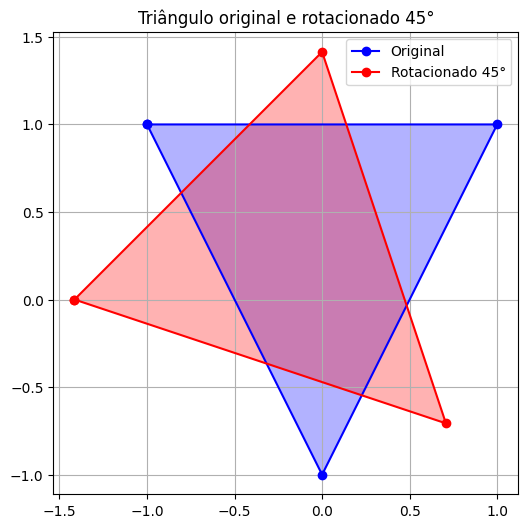

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

# Triângulo original
plt.plot(triangulo_original[:, 0], triangulo_original[:, 1], 'bo-', label='Original')
plt.fill(triangulo_original[:, 0], triangulo_original[:, 1], 'blue', alpha=0.3)

# Triângulo rotacionado
plt.plot(triangulo_transformado[:, 0], triangulo_transformado[:, 1], 'ro-', label='Rotacionado 45°')
plt.fill(triangulo_transformado[:, 0], triangulo_transformado[:, 1], 'red', alpha=0.3)

plt.axis('equal')
plt.grid(True)
plt.legend()
plt.title("Triângulo original e rotacionado 45°")
plt.show()

#### **Exercício 02**
Determine uma transformação linear $T:\mathbb{R}^5 \to \mathbb{R}^3$ tal que $Im(T) = [(1,0,0),(0,1,0),(1,1,1)]$ e $Ker(T) = [(1,1,1,1,1),(1,1,1,1,0)]$.

$T(1, 1, 1, 1, 1) = (1, 0, 0) + (0, 1, 0) + (1, 1, 1) - ((1, 0, 0) + (1, 1, 0) + (1, 1, 1)) + 0 = 0$

$T(1, 1, 1, 1, 0) = (1, 0, 0) + (0, 1, 0) + (1, 1, 1) - ((1, 0, 0) + (1, 1, 0) + (1, 1, 1)) + 0 = 0$

In [44]:
# Imagem
a1 = np.array([1, 0, 0])
a2 = np.array([0, 1, 0])
a3 = np.array([1, 1, 1])

# Achar outros dois vetores que satisfaçam a transformação do núcleo
a4 = -(a1 + a2 + a3)
a5 = np.array([0,0,0])

np.column_stack([a1, a2, a3, a4, a5])

array([[ 1,  0,  1, -2,  0],
       [ 0,  1,  1, -2,  0],
       [ 0,  0,  1, -1,  0]])